# Exploratory data analysis

In this notebook we will perform any data processing that is required in order to be able to load the provided data into a Pandas based dataframe. Then we will take a quick look at each feature with the intention of discovering superficial patterns that hopefully will aid and inspire us for modeling.

***The answer to the first question can be found here: ***
- [Answer to first question](#cell_first_question)


## Data processing

In [1]:
import json
from os import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 7]

We will load our data into json format and then parse it into a pandas dataframe.

In [2]:
df_original = pd.read_json('data/original/city_search.json')

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20022 entries, 0 to 20021
Data columns (total 4 columns):
session_id        20022 non-null object
unix_timestamp    20022 non-null object
cities            20022 non-null object
user              20022 non-null object
dtypes: object(4)
memory usage: 625.8+ KB


***Observations***
- We have 20022 non-null rows.
- The data type for each column is object. This is incorrect since we know that we have dates and numbers in our data.

Let's have a look at the first few lines to verify this.



In [4]:
df_original.head()

session_id unix_timestamp  \
0  [X061RFWB06K9V]   [1442503708]   
1  [5AZ2X2A9BHH5U]   [1441353991]   
2  [SHTB4IYAX4PX6]   [1440843490]   
3  [JBRB8MZGTX3M4]   [1427268063]   
4  [YJCMPURC2FL9C]   [1430559067]   

                                           cities  \
0                        [New York NY, Newark NJ]   
1  [New York NY, Jersey City NJ, Philadelphia PA]   
2                                [San Antonio TX]   
3                                   [Edmonton AB]   
4                        [Phoenix AZ, Houston TX]   

                                                user  
0  [[{'user_id': 2024, 'joining_date': '2015-03-2...  
1  [[{'user_id': 2853, 'joining_date': '2015-03-2...  
2  [[{'user_id': 10958, 'joining_date': '2015-03-...  
3  [[{'user_id': 7693, 'joining_date': '2015-03-1...  
4  [[{'user_id': 7506, 'joining_date': '2015-02-2...

Our dataframe contains json formatted strings inside its cells. Let's open the file as json and then parse it into a pandas dataframe. This will allow us to flatten the data and therefore be able to access it and analyze it with our tools of preference (pandas).


In [5]:
# Open json file into a dictionary
with open('data/original/city_search.json', 'r') as f:
    city_search_dict = json.load(f)

In [6]:
city_search_dict[0]

{'session_id': ['X061RFWB06K9V'],
 'unix_timestamp': [1442503708],
 'cities': ['New York NY, Newark NJ'],
 'user': [[{'user_id': 2024, 'joining_date': '2015-03-22', 'country': 'UK'}]]}

In [7]:
# This method will transform the dictionary that we created from the json above into a pandas dataframe
def create_dataframe(city_search_dict):
    df_flat = pd.DataFrame(columns =  ['session_id', 'unix_timestamp', 'cities', 'user_id', 'joining_date', 'country'])  
    for idx, search in enumerate(city_search_dict):
        for usr_det in search['user'][0]:
            user_id = usr_det['user_id']
            joining_date = usr_det['joining_date']
            country = usr_det['country']
        
    df_flat.loc[idx] = [search['session_id'][0], search['unix_timestamp'][0], search['cities'][0], user_id, joining_date, country]

In [8]:
# Call the method to create the datafrma from dictionary if it hasn't been done before. Otherwise load the already
# created file from csv to dataframe

if path.exists('data/flattened/df_city_search.csv') == False:
    # Transform the dictionary into a pandas df
    df_flat = create_dataframe(city_search_dict)
    # Save it to disk
    df_flat.to_csv('data/flattened/df_city_search.csv', index = None, header=True)
else:
    df_flat = pd.read_csv('data/flattened/df_city_search.csv')

We have now finished processing our data so we can explore it with python. From now on as we execute this notebook we won't preprocess it every time, instead we will load it from the place we saved it at the first time we process it.


In [9]:
# Make sure that Nan is encoded as ''. Otherwise the code that follows might not work as expected
df_flat.replace(np.nan, '', regex=True, inplace=True)
df_flat.head(10)

session_id  unix_timestamp  \
0  X061RFWB06K9V      1442503708   
1  5AZ2X2A9BHH5U      1441353991   
2  SHTB4IYAX4PX6      1440843490   
3  JBRB8MZGTX3M4      1427268063   
4  YJCMPURC2FL9C      1430559067   
5  LKOKP80QD6BEO      1434199991   
6  YOVUIM79SGS5Y      1443171887   
7  SHXEY67QWKP9K      1431766104   
8  9P74JL5KMC9G9      1434816246   
9  UY49RTVRX3GL7      1439104667   

                                         cities  user_id joining_date country  
0                        New York NY, Newark NJ     2024   2015-03-22      UK  
1  New York NY, Jersey City NJ, Philadelphia PA     2853   2015-03-28      DE  
2                                San Antonio TX    10958   2015-03-06      UK  
3                                   Edmonton AB     7693   2015-03-12      IT  
4                        Phoenix AZ, Houston TX     7506   2015-02-28      UK  
5                                  San Diego CA     3743   2015-03-04      ES  
6                       Montreal QC, Chicago IL     8831   2015-03-02          
7                       Calgary AB, New York NY      587   2015-03-16          
8                       Chicago IL, New York NY      365   2015-03-22      US  
9                                   New York NY     5995   2015-03-21

Let's move on to the data analysis part of the project. We will start by studying the features one by one to see what insights naturally bubble up to the surface.


## Data analysis

Let's take a look at our features independently, maybe we will discover some interesting patterns.

### Session Id

In [10]:
df_flat['session_id'].describe()

count             20022
unique            20022
top       HXUU5L1W0HYI7
freq                  1
Name: session_id, dtype: object

***Observations***
- All the session ids are unique. This means that each row represents one specific session in which a search was performed.


### User Id

In [11]:
# Transform the ids to strings in the dataframe so they are seen as categorical variables by pandas
df_flat['user_id'] = df_flat.apply(lambda row: str(row['user_id']), axis=1)

In [12]:
df_flat['user_id'].describe()

count     20022
unique     5777
top        4314
freq         12
Name: user_id, dtype: object

***Observations***
- We have data for 5777 unique user ids

Lets group our data per user_id and country to see if we can find any relationships between the two.

In [13]:
df_grouped_userid_and_country = df_flat.groupby(['user_id', 'country'])
list(df_grouped_userid_and_country.groups.keys())[:3]

[('10', 'DE'), ('100', 'UK'), ('1000', 'UK')]

We now have one group of data for each possible conbination of user_id and country. Let's extract how many different user ids per country we have.

In [15]:
from koalas import *

base_feature = 'country'
base_feature_unique = df_flat[base_feature].unique()

print('-----------------------------------------------------------------')
print('Base feature *{}* with {} unique values: {}'.format(base_feature, 
                                                   len(base_feature_unique),
                                                   base_feature_unique))
print('-----------------------------------------------------------------')

# Create quantitative statistics of each group
analyze_groups(df_flat, base_feature)

secondary_feature = 'user_id' # We'll loop here
user_ids_per_country = count_ocurrence_of_one_feature_into_another(df_flat, base_feature, secondary_feature)
userids_per_country_counts = [(k,len(val)) for k, val in user_ids_per_country.items()]

print('Different user ids per country: ' + str(userids_per_country_counts))
print('Unique *{}* per *{}*'.format(secondary_feature, base_feature))

print('-------------')

print('Intersection matrix')
print(base_feature_unique)
for country in base_feature_unique:
    
    print(str([len(user_ids_per_country[country].intersection(user_ids_per_country[c])) for c in df_flat['country'].unique()])
         + str(country))

-----------------------------------------------------------------
Base feature *country* with 7 unique values: ['UK' 'DE' 'IT' 'ES' '' 'US' 'FR']
-----------------------------------------------------------------


NameError: name 'secondary_feature' is not defined

***Observations***
- Each one of the countries has an independent user set. As we would have imagined there is no user with more than one country.
- The country with no name has 792 unique users among all the countries. This is a strong indication that this country is an entirely different country
- UK, ES and FR have the highest numbers of different and unique users
- The US has a fairly low number of unique users given the fact that it has the highest number of search sessions.



### Cities

In [17]:
df_flat['cities'].describe()

count           20022
unique           1329
top       New York NY
freq             2278
Name: cities, dtype: object

***Observations***
- We have 1329 unique ordered sequences of cities (searches). It ill be interesting to figure out in more detail the distribution of the length of the search sequences. 

#### Feature engineering: cities_searched

Let's create a new feature that will describe the number of cities per search. This will make our task of exploring city related features easier.

In [18]:
df_flat['cities_searched'] = df_flat.apply(lambda row: row['cities'].count(',')+1, axis=1)

In [19]:
df_flat.head()

session_id  unix_timestamp  \
0  X061RFWB06K9V      1442503708   
1  5AZ2X2A9BHH5U      1441353991   
2  SHTB4IYAX4PX6      1440843490   
3  JBRB8MZGTX3M4      1427268063   
4  YJCMPURC2FL9C      1430559067   

                                         cities user_id joining_date country  \
0                        New York NY, Newark NJ    2024   2015-03-22      UK   
1  New York NY, Jersey City NJ, Philadelphia PA    2853   2015-03-28      DE   
2                                San Antonio TX   10958   2015-03-06      UK   
3                                   Edmonton AB    7693   2015-03-12      IT   
4                        Phoenix AZ, Houston TX    7506   2015-02-28      UK   

   cities_searched  
0                2  
1                3  
2                1  
3                1  
4                2

In [20]:
df_flat['cities_searched'].describe()

count    20022.000000
mean         1.648986
std          0.874272
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: cities_searched, dtype: float64

This is some very interesting information.

***Observations***
- The average number of cities searched is 1.648986
- The first 50% of the data points represent only one searched city
- The next 25% represents searches for 1 or 2 cities.
- The last 25% represents searches from 2 to 11 cities
- Our data is skewed

### Space of possible cities

Let's now extract the cities from the data to create a list of all the possible cities. This will help us tokenize our city sequences in order to train sequential models down the line.

In [21]:
df_flat['cities'].unique()

array(['New York NY, Newark NJ',
       'New York NY, Jersey City NJ, Philadelphia PA', 'San Antonio TX',
       ..., 'Edmonton AB, Houston TX, Toronto ON, Los Angeles CA',
       'San Diego CA, New York NY, Houston TX',
       'Houston TX, Chicago IL, Los Angeles CA'], dtype=object)

In [22]:
def extract_cities(dataframe):
    city_set = set()
    for index, row in dataframe.iterrows():
        searched_cities = [city.strip() for city in row['cities'].split(",")]

        for city in searched_cities:
            city_set.add(city)
    city_list = list(city_set)
    return city_list

In [23]:
# Convert set to list
city_list = extract_cities(df_flat)
# Sort cities in alphabetical orther for reproducibility purposes.
city_list.sort()

print(city_list)
print(len(city_list))

with open('data/city_list.json', 'w') as json_file:
    json.dump({'city_list':city_list}, json_file)

['Anaheim CA', 'Arlington TX', 'Atlanta GA', 'Austin TX', 'Bakersfield CA', 'Baltimore MD', 'Birmingham AL', 'Boston MA', 'Buffalo NY', 'Calgary AB', 'Chandler AZ', 'Charlotte NC', 'Chesapeake VA', 'Chicago IL', 'Cincinnati OH', 'Cleveland OH', 'Columbus OH', 'Corpus Christi TX', 'Dallas TX', 'Detroit MI', 'Edmonton AB', 'Fort Wayne IN', 'Fort Worth TX', 'Fresno CA', 'Glendale AZ', 'Greensboro NC', 'Halifax NS', 'Hamilton ON', 'Hialeah FL', 'Houston TX', 'Indianapolis IN', 'Jacksonville FL', 'Jersey City NJ', 'Kansas City MO', 'Kitchener ON', 'Lexington KY', 'Lincoln NE', 'London ON', 'Long Beach CA', 'Los Angeles CA', 'Louisville KY', 'Madison WI', 'Memphis TN', 'Mesa AZ', 'Miami FL', 'Milwaukee WI', 'Minneapolis MN', 'Montreal QC', 'Nashville TN', 'New Orleans LA', 'New York NY', 'Newark NJ', 'Norfolk VA', 'OTTAWA ON', 'Oakland CA', 'Oklahoma City OK', 'Omaha NE', 'Oshawa ON', 'Philadelphia PA', 'Phoenix AZ', 'Pittsburgh PA', 'Plano TX', 'Portland OR', 'Quebec QC', 'Raleigh NC', 'Riv

We are working with 89 different cities. 

#### Feature engineering: tokenized sequences

Let's create a feature that will encode the search sequences as lists of integers (we'll call them tokens). This feature will be of crucial importance since we will use it directly to represent one search session which corresponds to each datapoint. It will also be used to pass into our models in the next section.



In [24]:
def tokenize_sequence(sequence_str):
    raw_sequence = [city.strip() for city in sequence_str.split(",")]
    token_sequence = []
    for city in raw_sequence:
        token_sequence.append(city_list.index(city)+1)
    
    return token_sequence

In [25]:
# Tokenize the search sequences
df_flat['city_integer_sequence'] = df_flat['cities'].apply(tokenize_sequence)

In [26]:
print('Original search: ' + str(df_flat['cities'].values[0]))
print('Tokenized search: ' + str(df_flat['city_integer_sequence'].values[0]))

Original search: New York NY, Newark NJ
Tokenized search: [51, 52]


Let's also create a binary representation of each search so that the value of the token of each city searched is positionaly encoded as one in a vector of zeros of length total number of cities. Look at the logs bellow for clarity.
This feature will help us to characterize our data by patterns in the binary sequences that represent each search


In [27]:
def binarize_sequence(sequence_str):
    raw_sequence = [city.strip() for city in sequence_str.split(",")]
    integer_sequence = [0] * len(city_list)
    
    for city in raw_sequence:
        integer_sequence[city_list.index(city)] += 1
        
    return integer_sequence

In [28]:
df_flat['binary_sequence'] = df_flat['cities'].apply(binarize_sequence)

In [29]:
print('Original search: ' + str(df_flat['cities'].values[0]))
print('Tokenized search: ' + str(df_flat['city_integer_sequence'].values[0]))
print('Binarized search: ' + str(df_flat['binary_sequence'].values[0]))

Original search: New York NY, Newark NJ
Tokenized search: [51, 52]
Binarized search: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Joining date

In [30]:
df_flat['joining_date'] =  pd.to_datetime(df_flat['joining_date'], format='%Y-%m-%d')

In [31]:
df_flat['joining_date'].describe()

count                   20022
unique                     35
top       2015-03-02 00:00:00
freq                      857
first     2015-02-28 00:00:00
last      2015-04-03 00:00:00
Name: joining_date, dtype: object

In [32]:
print('Unique dates: ' + str(len(df_flat['joining_date'].unique())))
print('Unique dates: ' + str(df_flat['joining_date'].unique()))

Unique dates: 35
Unique dates: ['2015-03-22T00:00:00.000000000' '2015-03-28T00:00:00.000000000'
 '2015-03-06T00:00:00.000000000' '2015-03-12T00:00:00.000000000'
 '2015-02-28T00:00:00.000000000' '2015-03-04T00:00:00.000000000'
 '2015-03-02T00:00:00.000000000' '2015-03-16T00:00:00.000000000'
 '2015-03-21T00:00:00.000000000' '2015-03-27T00:00:00.000000000'
 '2015-03-30T00:00:00.000000000' '2015-03-17T00:00:00.000000000'
 '2015-03-15T00:00:00.000000000' '2015-03-19T00:00:00.000000000'
 '2015-03-20T00:00:00.000000000' '2015-03-01T00:00:00.000000000'
 '2015-03-11T00:00:00.000000000' '2015-03-07T00:00:00.000000000'
 '2015-03-13T00:00:00.000000000' '2015-03-05T00:00:00.000000000'
 '2015-03-26T00:00:00.000000000' '2015-03-25T00:00:00.000000000'
 '2015-03-24T00:00:00.000000000' '2015-03-10T00:00:00.000000000'
 '2015-03-23T00:00:00.000000000' '2015-03-14T00:00:00.000000000'
 '2015-03-03T00:00:00.000000000' '2015-03-29T00:00:00.000000000'
 '2015-03-31T00:00:00.000000000' '2015-03-09T00:00:00.00000

So we have data between 2015-02-28 and 2015-04-03 with a maximum number of joins on the 2015-03-02.

### Unix timestamp

In [33]:
df_flat['unix_timestamp'].describe()

count    2.002200e+04
mean     1.435049e+09
std      5.000951e+06
min      1.425095e+09
25%      1.430775e+09
50%      1.434986e+09
75%      1.439373e+09
max      1.443747e+09
Name: unix_timestamp, dtype: float64

#### Feature engineering : unix_timestamp

Let's create a new feature called 'timestamp' from 'unix_timestamp'. This feature will be of great use since it will allow us to see our data as a time series over the time range defined by the dates in it. 

In [34]:
df_flat['timestamp'] = df_flat.apply(lambda row:pd.to_datetime( row['unix_timestamp'], unit = 's'), axis=1)

In [35]:
df_flat['timestamp'].describe()

count                   20022
unique                  20003
top       2015-09-25 08:44:47
freq                        2
first     2015-02-28 03:40:35
last      2015-10-02 00:48:22
Name: timestamp, dtype: object

***Observations*** 
- We have 20003 unique timestamps over a total of 20022. This means that 19 of them are repeated with might mean that the search sessions were registered at the same time
- We have data between the end of February to the beginning of October of 2015



In [36]:
df_flat.head()

session_id  unix_timestamp  \
0  X061RFWB06K9V      1442503708   
1  5AZ2X2A9BHH5U      1441353991   
2  SHTB4IYAX4PX6      1440843490   
3  JBRB8MZGTX3M4      1427268063   
4  YJCMPURC2FL9C      1430559067   

                                         cities user_id joining_date country  \
0                        New York NY, Newark NJ    2024   2015-03-22      UK   
1  New York NY, Jersey City NJ, Philadelphia PA    2853   2015-03-28      DE   
2                                San Antonio TX   10958   2015-03-06      UK   
3                                   Edmonton AB    7693   2015-03-12      IT   
4                        Phoenix AZ, Houston TX    7506   2015-02-28      UK   

   cities_searched city_integer_sequence  \
0                2              [51, 52]   
1                3          [51, 33, 59]   
2                1                  [71]   
3                1                  [21]   
4                2              [60, 30]   

                                     binary_sequence           timestamp  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-09-17 15:28:28  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-09-04 08:06:31  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-08-29 10:18:10  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-03-25 07:21:03  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-05-02 09:31:07

In [37]:
df_search_time_serie = df_flat.set_index('timestamp')
df_search_time_serie.head(3)

session_id  unix_timestamp  \
timestamp                                            
2015-09-17 15:28:28  X061RFWB06K9V      1442503708   
2015-09-04 08:06:31  5AZ2X2A9BHH5U      1441353991   
2015-08-29 10:18:10  SHTB4IYAX4PX6      1440843490   

                                                           cities user_id  \
timestamp                                                                   
2015-09-17 15:28:28                        New York NY, Newark NJ    2024   
2015-09-04 08:06:31  New York NY, Jersey City NJ, Philadelphia PA    2853   
2015-08-29 10:18:10                                San Antonio TX   10958   

                    joining_date country  cities_searched  \
timestamp                                                   
2015-09-17 15:28:28   2015-03-22      UK                2   
2015-09-04 08:06:31   2015-03-28      DE                3   
2015-08-29 10:18:10   2015-03-06      UK                1   

                    city_integer_sequence  \
timestamp                                   
2015-09-17 15:28:28              [51, 52]   
2015-09-04 08:06:31          [51, 33, 59]   
2015-08-29 10:18:10                  [71]   

                                                       binary_sequence  
timestamp                                                               
2015-09-17 15:28:28  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2015-09-04 08:06:31  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2015-08-29 10:18:10  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

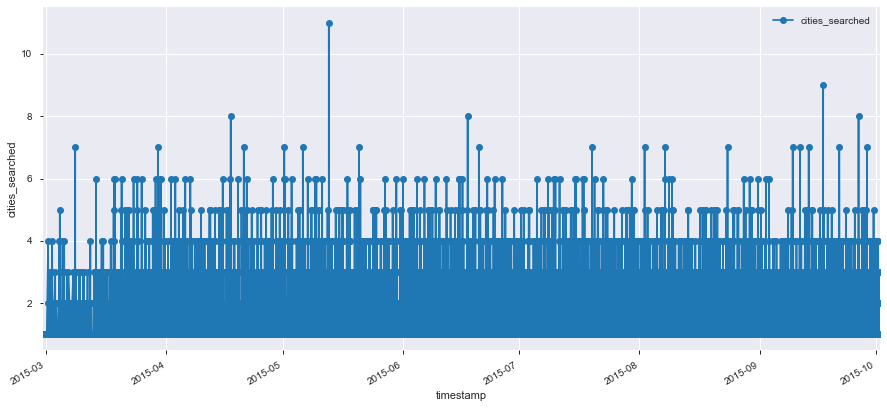

In [38]:
df_search_time_serie['cities_searched'].plot(marker='o')
plt.legend()
plt.ylabel("cities_searched");

In [39]:
assert df_search_time_serie.loc['2015'].shape[0] == df_flat.shape[0]

In [40]:
print('Different dates: ' + str(len(df_search_time_serie.index.unique())))

Different dates: 20003


***Observations***

- We have 20003 different dates.
- The longest search happened between 2015-05 and 2015-6
- This graph is very difficult to understand. Let's try other approaches bellow.



Lets bin our time dataframe so we can plot the amount of searches in each bin over time. This might help us discover some more patterns.

In [41]:
def bin_dataframe_over_time(dataframe, time_col, frequency):
    """
    Bins the dataframe over the colum defined by time_col with a frequency given.
    :param dataframe: Data to bin.
    :param time_col: Name of column to bin over.
    :param frequency: Frequency of the binning
    :return: Padded numpy array of sequences
    """
    bined = dataframe.groupby(pd.Grouper(key=time_col, freq=frequency)).count()
    return bined

In [42]:
df_binned = bin_dataframe_over_time(df_flat, 'timestamp', '600min')
df_binned.head()

session_id  unix_timestamp  cities  user_id  \
timestamp                                                          
2015-02-28 00:00:00           1               1       1        1   
2015-02-28 10:00:00           1               1       1        1   
2015-02-28 20:00:00           1               1       1        1   
2015-03-01 06:00:00           4               4       4        4   
2015-03-01 16:00:00           3               3       3        3   

                     joining_date  country  cities_searched  \
timestamp                                                     
2015-02-28 00:00:00             1        1                1   
2015-02-28 10:00:00             1        1                1   
2015-02-28 20:00:00             1        1                1   
2015-03-01 06:00:00             4        4                4   
2015-03-01 16:00:00             3        3                3   

                     city_integer_sequence  binary_sequence  
timestamp                                                    
2015-02-28 00:00:00                      1                1  
2015-02-28 10:00:00                      1                1  
2015-02-28 20:00:00                      1                1  
2015-03-01 06:00:00                      4                4  
2015-03-01 16:00:00                      3                3

This dataframe is now binned over the timestamp column, which is also now the index of the dataframe. The data itself consists of values that are equal row wise, this is because each one of them represents the number of rows in each bin. Lets verify with code to make sure we are right.

In [43]:
for column in df_binned.columns:
    assert (df_binned['session_id'].values == df_binned[column].values).all(), 'One of the columns is not equal to Session_id'

Looks like our hypothesis was correct. All the columns are equal, let's colapse all the column into one called 'counta'

In [44]:
print(list(df_binned.columns)[:-1])

['session_id', 'unix_timestamp', 'cities', 'user_id', 'joining_date', 'country', 'cities_searched', 'city_integer_sequence']


In [45]:
# Here we take the value of session_id but we coult take the values of any other column.
df_binned['count'] = df_binned['session_id'].values
# We drop all the other columns
search_count_series = df_binned.drop(list(df_binned.columns)[:-1], axis=1)
search_count_series.head()

count
timestamp                 
2015-02-28 00:00:00      1
2015-02-28 10:00:00      1
2015-02-28 20:00:00      1
2015-03-01 06:00:00      4
2015-03-01 16:00:00      3

Lets plot the series of number of searches over time using the binned dataframe that we just created.

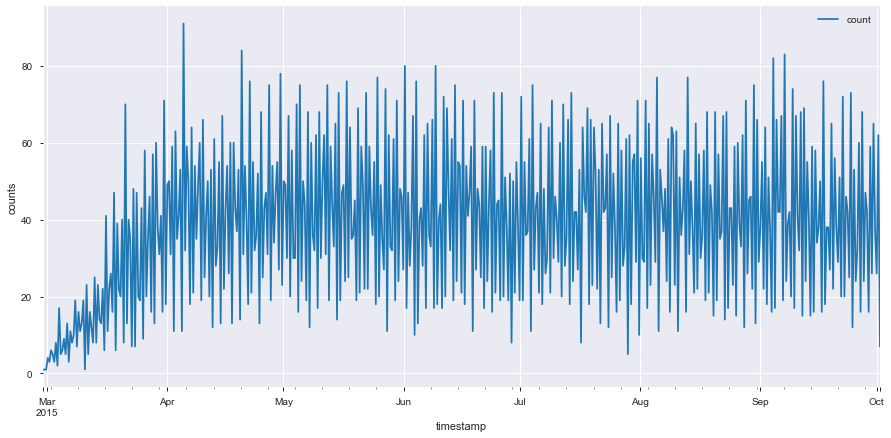

In [46]:
search_count_series.plot()
plt.legend()
plt.ylabel("counts");

This graph is too much noise. It is not easy to spot any seasonal patterns right away. Lets make use of the library  [statsmodels]( https://www.statsmodels.org/stable/index.html) the extract the seasonal and the trend components of our serie. This might make it easier to understand.

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(search_count_series, model='additive')

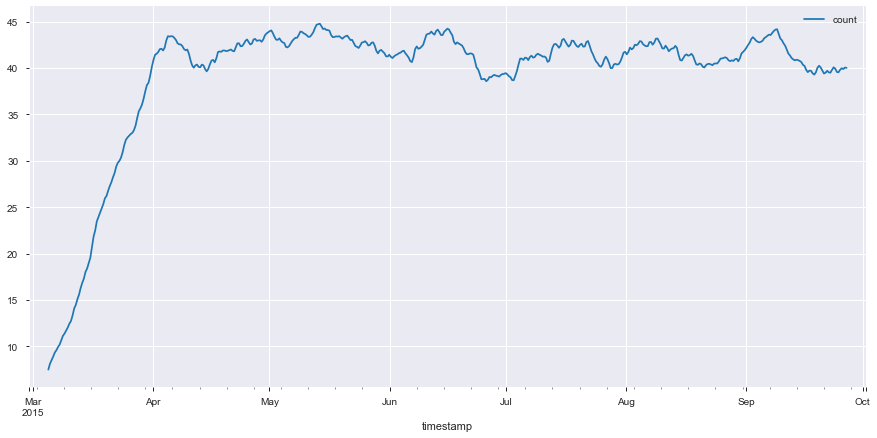

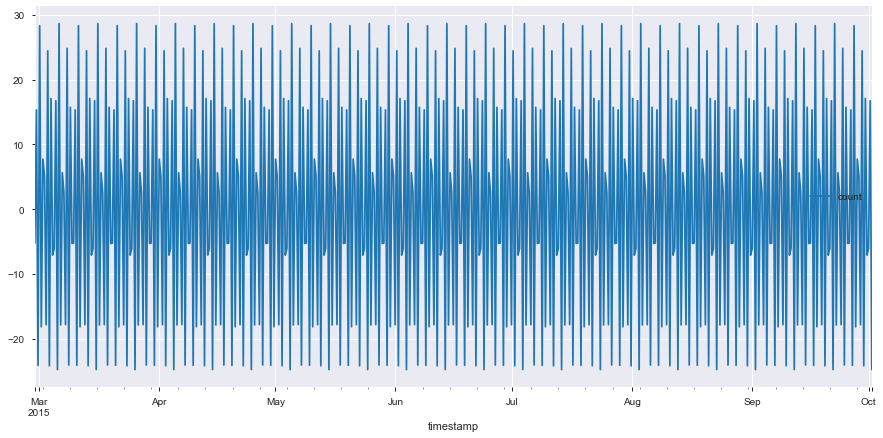

In [48]:
result.trend.plot()
result.seasonal.plot()

No clear patterns emerge. We should split the data by country and perform the same analysis. This will be done in the next section. In order to go deeper into this we split our data per country and then plot the resulting series separetely to see if we can understand these patterns better.

**Observations**
- The trend is positive for the data we have in April and then plateaus between 40 and 45 
- The seasonality quickly changes through all the data. It is not easy to identify any seasonal patterns. 

## Country

Let's separate our data by country and see if any more patterns emerge. It should be easier to characterize searches once we split the data by country.

In [49]:
df_flat['country'].describe()

count     20022
unique        7
top          US
freq       3876
Name: country, dtype: object

In [50]:
df_flat['country'].unique()

array(['UK', 'DE', 'IT', 'ES', '', 'US', 'FR'], dtype=object)

The data corresponds to 7 different contries, one of which is missing. Let's explore more

In [51]:
df_missing_country = df_flat.loc[df_flat['country'] == '']
print(df_missing_country.shape)
df_missing_country.head()

(2820, 10)


session_id  unix_timestamp                   cities user_id  \
6   YOVUIM79SGS5Y      1443171887  Montreal QC, Chicago IL    8831   
7   SHXEY67QWKP9K      1431766104  Calgary AB, New York NY     587   
9   UY49RTVRX3GL7      1439104667              New York NY    5995   
19  YQAEPPG214CNU      1439713760  Toronto ON, New York NY     957   
37  51H4C2DEYXG5D      1436444694              New York NY    5433   

   joining_date country  cities_searched city_integer_sequence  \
6    2015-03-02                        2              [48, 14]   
7    2015-03-16                        2              [10, 51]   
9    2015-03-21                        1                  [51]   
19   2015-03-30                        2              [81, 51]   
37   2015-03-05                        1                  [51]   

                                      binary_sequence           timestamp  
6   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ... 2015-09-25 09:04:47  
7   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ... 2015-05-16 08:48:24  
9   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-08-09 07:17:47  
19  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-08-16 08:29:20  
37  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-07-09 12:24:54

Samples for the missing country


In [52]:
df_missing_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2820 entries, 6 to 20017
Data columns (total 10 columns):
session_id               2820 non-null object
unix_timestamp           2820 non-null int64
cities                   2820 non-null object
user_id                  2820 non-null object
joining_date             2820 non-null datetime64[ns]
country                  2820 non-null object
cities_searched          2820 non-null int64
city_integer_sequence    2820 non-null object
binary_sequence          2820 non-null object
timestamp                2820 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 242.3+ KB


So there are 2820 records that are missing their value for 'country'.

#### Feature engineering : country_code

Let's create a feature that provides a numerical encoding for country so that we can visualize our more easily.


In [53]:
# Notice that the missing country is encoded as 0
country_color_dict = {'': 0, 'UK':1, 'DE':2, 'IT':3, 'ES':4, 'US':5, 'FR':6}

In [54]:
df_flat['country_code'] = df_flat.apply (lambda row: country_color_dict[row['country']], axis=1)
df_flat.head()

session_id  unix_timestamp  \
0  X061RFWB06K9V      1442503708   
1  5AZ2X2A9BHH5U      1441353991   
2  SHTB4IYAX4PX6      1440843490   
3  JBRB8MZGTX3M4      1427268063   
4  YJCMPURC2FL9C      1430559067   

                                         cities user_id joining_date country  \
0                        New York NY, Newark NJ    2024   2015-03-22      UK   
1  New York NY, Jersey City NJ, Philadelphia PA    2853   2015-03-28      DE   
2                                San Antonio TX   10958   2015-03-06      UK   
3                                   Edmonton AB    7693   2015-03-12      IT   
4                        Phoenix AZ, Houston TX    7506   2015-02-28      UK   

   cities_searched city_integer_sequence  \
0                2              [51, 52]   
1                3          [51, 33, 59]   
2                1                  [71]   
3                1                  [21]   
4                2              [60, 30]   

                                     binary_sequence           timestamp  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-09-17 15:28:28   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-09-04 08:06:31   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-08-29 10:18:10   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-03-25 07:21:03   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-05-02 09:31:07   

   country_code  
0             1  
1             2  
2             1  
3             3  
4             1

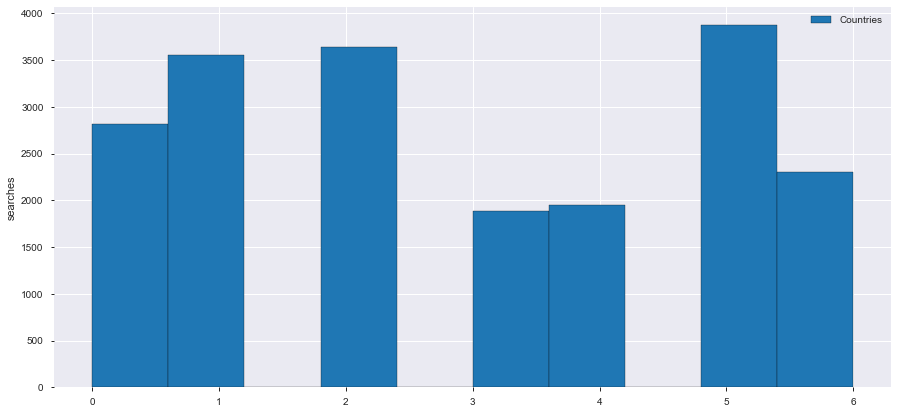

In [55]:
plt.hist(df_flat['country_code'].values,  label="Countries", histtype='bar', ec='black')
plt.legend()
plt.ylabel("searches");

Simple histogram for the amount of searches per country.

Below we will recreate the time series indexed on 'timestamp' that we used in the last section.

In [56]:
df_search_time_serie = df_flat.set_index('timestamp')
df_search_time_serie.head(3)

session_id  unix_timestamp  \
timestamp                                            
2015-09-17 15:28:28  X061RFWB06K9V      1442503708   
2015-09-04 08:06:31  5AZ2X2A9BHH5U      1441353991   
2015-08-29 10:18:10  SHTB4IYAX4PX6      1440843490   

                                                           cities user_id  \
timestamp                                                                   
2015-09-17 15:28:28                        New York NY, Newark NJ    2024   
2015-09-04 08:06:31  New York NY, Jersey City NJ, Philadelphia PA    2853   
2015-08-29 10:18:10                                San Antonio TX   10958   

                    joining_date country  cities_searched  \
timestamp                                                   
2015-09-17 15:28:28   2015-03-22      UK                2   
2015-09-04 08:06:31   2015-03-28      DE                3   
2015-08-29 10:18:10   2015-03-06      UK                1   

                    city_integer_sequence  \
timestamp                                   
2015-09-17 15:28:28              [51, 52]   
2015-09-04 08:06:31          [51, 33, 59]   
2015-08-29 10:18:10                  [71]   

                                                       binary_sequence  \
timestamp                                                                
2015-09-17 15:28:28  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2015-09-04 08:06:31  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2015-08-29 10:18:10  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                     country_code  
timestamp                          
2015-09-17 15:28:28             1  
2015-09-04 08:06:31             2  
2015-08-29 10:18:10             1

We'll use it to visualize the distribution of searches over one day of time per country. This way we'll see if some countries start doing searches before others.

In [57]:
df_search_time_serie_day = df_search_time_serie.loc['2015-03-20']

<a id='cell_60_graph'></a>

No handles with labels found to put in legend.


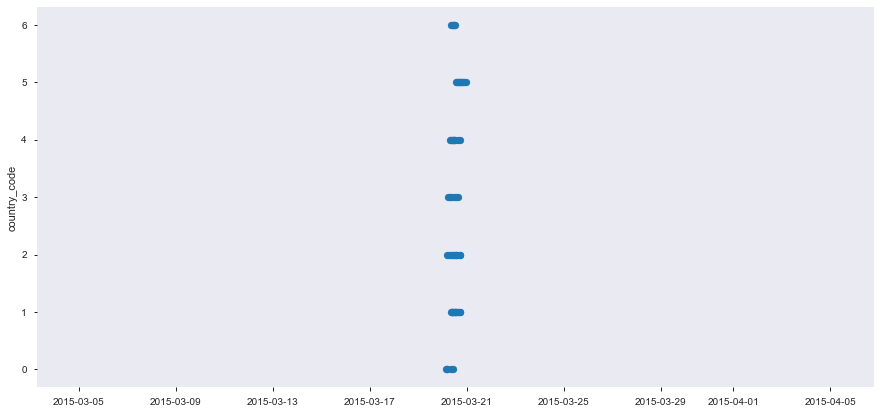

In [58]:
plt.scatter(df_search_time_serie_day.index, df_search_time_serie_day['country_code'])
plt.grid()
plt.legend()
plt.ylabel("country_code");

country_color_dict = {'': 0, 'UK':1, 'DE':2, 'IT':3, 'ES':4, 'US':5, 'FR':6}

***Observations***
- In the above graph we can clearly see that users in diferent countries start searching at different points of the day. For instance the unknown country starts sending search requests as the day starts.
- The US is the one that starts later during the day given our time parametrization. 
- We can see the time zone difference in this plot since the countries that get the sun before also start emitting searches before.
- Our unknown country starts emitting search requests a tiny bit before italy does.
- If the missing country belonged to another country we would see two complementary intervals in two different countries (the missing one and another one)

### Searches per country

Let's see if we can detect specific search patterns for users in the same country. We'll group our data per country and compute the most frequently searched cities along with their search counts. We might even be able to identify if the records with missing country values belong to one of the countries in the data or not. Let's see...

In [59]:
df_flat.head(2)


session_id  unix_timestamp  \
0  X061RFWB06K9V      1442503708   
1  5AZ2X2A9BHH5U      1441353991   

                                         cities user_id joining_date country  \
0                        New York NY, Newark NJ    2024   2015-03-22      UK   
1  New York NY, Jersey City NJ, Philadelphia PA    2853   2015-03-28      DE   

   cities_searched city_integer_sequence  \
0                2              [51, 52]   
1                3          [51, 33, 59]   

                                     binary_sequence           timestamp  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-09-17 15:28:28   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-09-04 08:06:31   

   country_code  
0             1  
1             2

In [60]:
df_flat[['country_code','cities_searched','country']].groupby(['country']).describe()


country_code                                    cities_searched  \
               count mean  std  min  25%  50%  75%  max           count   
country                                                                   
              2820.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          2820.0   
DE            3638.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0          3638.0   
ES            1953.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0          1953.0   
FR            2298.0  6.0  0.0  6.0  6.0  6.0  6.0  6.0          2298.0   
IT            1882.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0          1882.0   
UK            3555.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0          3555.0   
US            3876.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0          3876.0   

                                                       
             mean       std  min  25%  50%  75%   max  
country                                                
         1.637943  0.866658  1.0  1.0  1.0  2.0   9.0  
DE       1.650082  0.850295  1.0  1.0  1.0  2.0   7.0  
ES       1.639529  0.878427  1.0  1.0  1.0  2.0   7.0  
FR       1.639252  0.870835  1.0  1.0  1.0  2.0   8.0  
IT       1.664187  0.891738  1.0  1.0  1.0  2.0   8.0  
UK       1.661603  0.900495  1.0  1.0  1.0  2.0   8.0  
US       1.647575  0.869347  1.0  1.0  1.0  2.0  11.0

***Observations***

- The country with most searches is the US, followed by DE and the UK. (The rest of the values are shown above)
- The country with less searches is IT
- The unknown country has 2820.0 searches. This puts it between France and the UK.
- The US has data for the longest searches being the only one with sequences of length > 9
- The first 50% of all the data of all countries if for sequences of length 1, ie; at least half the data represents searches of only one city. 

Searches of only one city  will be useless if we want to use the search sequences as the set of observations for a model later on.


In [61]:
df_grouped_country = df_flat.groupby(['country'])

In [62]:
df_grouped_country.groups.keys()

dict_keys(['', 'DE', 'ES', 'FR', 'IT', 'UK', 'US'])

Let's bin our data so we can plot time series.

In [63]:
country_series = []
search_count_country_list = []
for key, group in df_grouped_country:
    print('Country: '+ str(key)+ ' search samples shape: ' + str(group.shape))
    
    if key != '':
        search_count_country_list.append(group.shape[0])
    df_binned = bin_dataframe_over_time(group, 'timestamp', '600min')
    print('Binned samples shape: ' + str(df_binned.shape))
    df_binned['count'] = df_binned['session_id'].values
    search_count_series = df_binned.drop(list(df_binned.columns)[:-1], axis=1)
    print('--------------')
    country_series.append((key, search_count_series))
    
print('Search counts mean per country: ' + str(np.mean(search_count_country_list)))

Country:  search samples shape: (2820, 11)
Binned samples shape: (518, 10)
--------------
Country: DE search samples shape: (3638, 11)
Binned samples shape: (515, 10)
--------------
Country: ES search samples shape: (1953, 11)
Binned samples shape: (515, 10)
--------------
Country: FR search samples shape: (2298, 11)
Binned samples shape: (513, 10)
--------------
Country: IT search samples shape: (1882, 11)
Binned samples shape: (516, 10)
--------------
Country: UK search samples shape: (3555, 11)
Binned samples shape: (513, 10)
--------------
Country: US search samples shape: (3876, 11)
Binned samples shape: (518, 10)
--------------
Search counts mean per country: 2867.0


***Observations***
- The US, followed by the UK are the countries that have performed more searches
- The missing country's amount of search observations (2815) is within a decent neighborhood of the mean of all the others. This means that it has an average number of values with respect to the other countries. It could be a country on it's own since it is not small enough to be added to another's country's records and not unbalance the others.
- The mean number of searches over all countries is 2864.66. The missing country is right next to this value with 2815 searches. This reinforces the hypothesis that the missing country is an entirely new country

<a id='cell_67_graphs'></a>

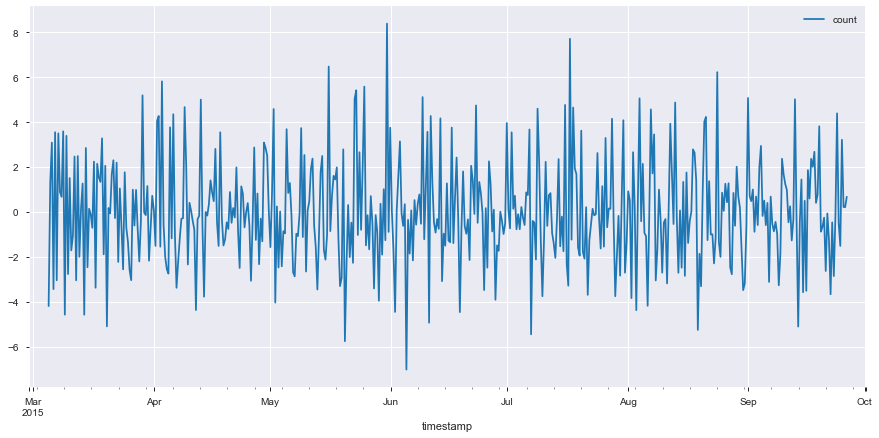

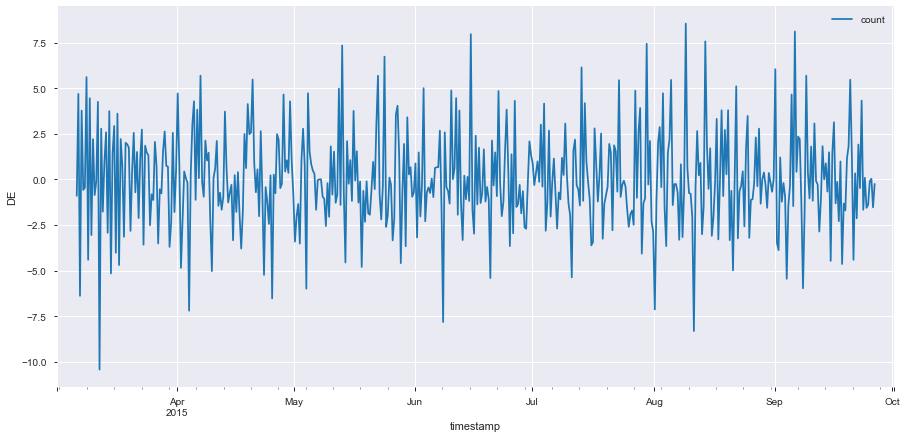

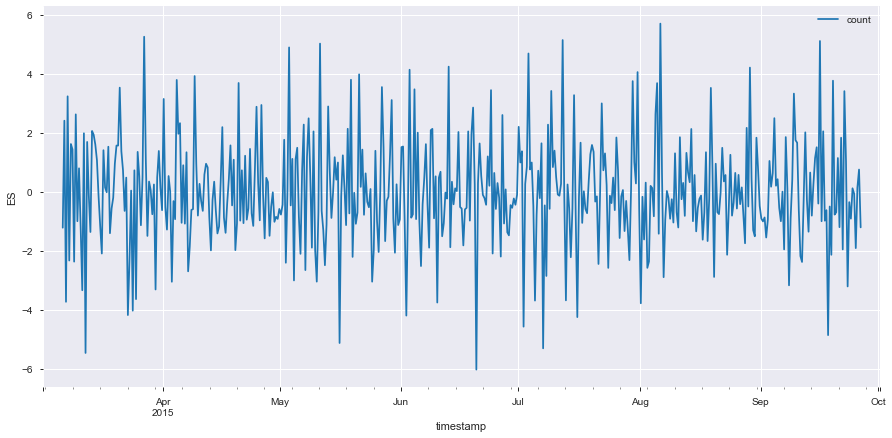

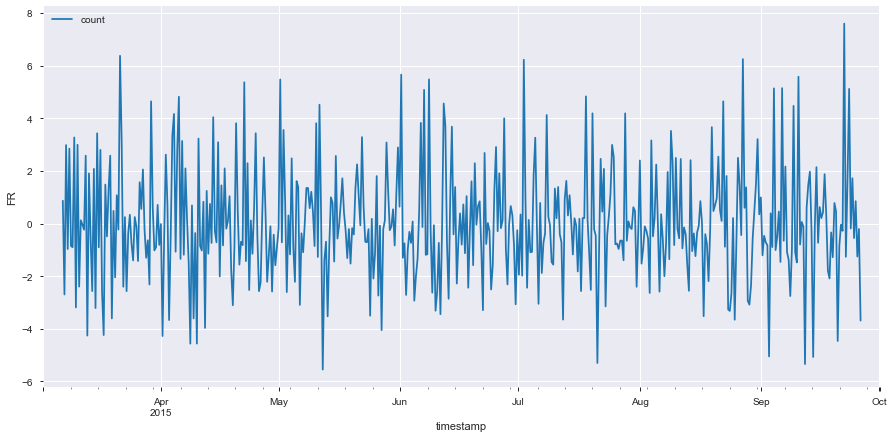

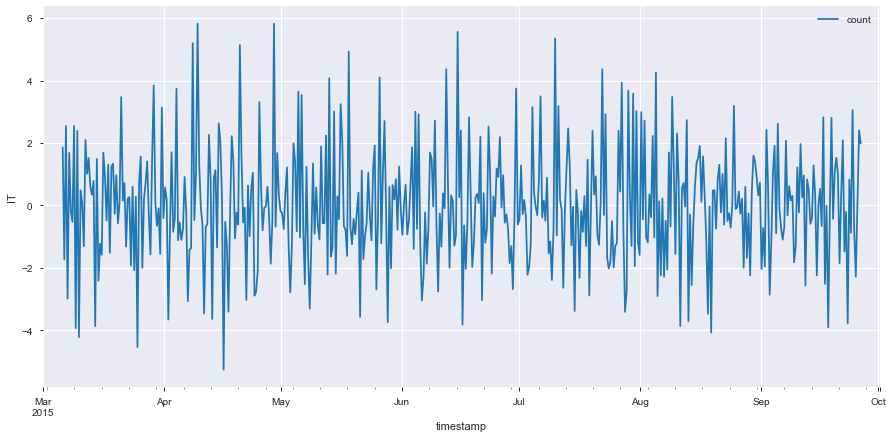

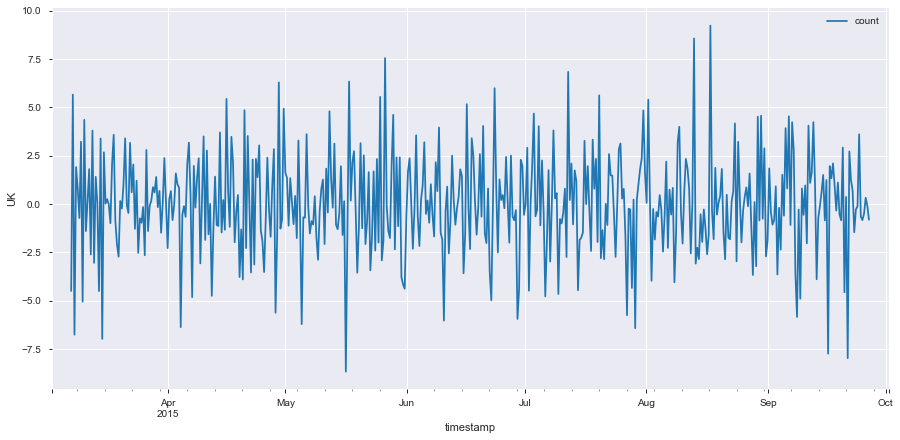

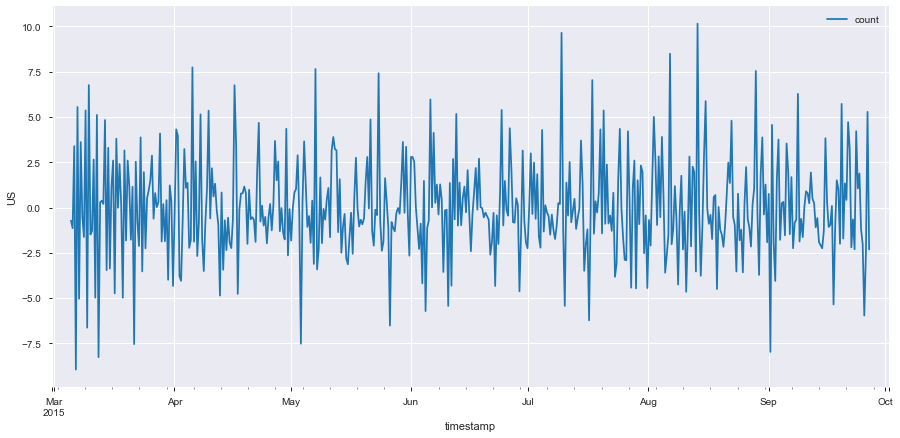

In [64]:
for country, serie in country_series:
    result = seasonal_decompose(serie, model='additive')
    result.resid.plot()
    plt.legend()
    plt.ylabel(country);

***Observations***
- From the above graphs we can see that we have 'decently distributed' data over all the time interval defined by 'timestamp 'for all the countries without major gaps. This might mean that we have received data continuously throughout the interval of time without visible interruptions. This might indicate that the missing country is another country entirely.

### City search counts


Let's make use of the binary_sequence feature that we previously engineered in order to compute the number of times each city was searched for in each country. We will add all the values of binary_sequence entry to entry:



In [65]:
def compute_search_counts_country(country_code):
    integer_sequence = [0] * len(city_list)
    for index, row in df_grouped_country.get_group(country_code).iterrows():
         integer_sequence = [sum(x) for x in zip(integer_sequence, row['binary_sequence'])]
        
    return dict(zip(city_list, integer_sequence))

In [66]:
def compute_search_counts(country_codes):
    df_search_counts = pd.DataFrame(columns=country_codes)
    df_search_counts['city'] = city_list
    for country_code in country_codes:
        df_search_counts[country_code] = compute_search_counts_country(country_code).values()
    
    df_search_counts.set_index('city', inplace=True)
    return df_search_counts

In [67]:
country_codes = df_flat['country'].unique()
df_search_counts = compute_search_counts(country_codes)

In [68]:
df_search_counts.head()

UK  DE  IT  ES      US  FR
city                                      
Anaheim CA      51  44  26  27  33  59  26
Arlington TX    26  22  17   8  14  19   7
Atlanta GA       6   1   1   3   2   6   2
Austin TX       53  45  19  15  27  49  30
Bakersfield CA   8   5   3   1   7  12   3

The dataframe above gives us some interesting information about the search patterns. The data in each column represents the number of times each one of the cities was searched. The dataframe is indexed on the name of the cities so we can have clear visibility on which city was searched for in each country, and at the same time be able to compare between countries. Let's make us of this dataframe to try and guess the missing country.


In [69]:
for country_code in country_codes:
    country_name = country_code
    if country_code == '':
        country_name = 'Missing country'
    
    print('--------------------')
    print('Country: ' + country_name)
    
    print(df_search_counts.sort_values([country_code], ascending=False)[country_code].head(10))
    print('\n')

--------------------
Country: UK
city
New York NY        960
Toronto ON         577
Los Angeles CA     479
Montreal QC        414
Chicago IL         344
Houston TX         243
Vancouver BC       213
Philadelphia PA    192
Dallas TX          153
OTTAWA ON          138
Name: UK, dtype: int64


--------------------
Country: DE
city
New York NY        991
Toronto ON         603
Los Angeles CA     453
Montreal QC        450
Chicago IL         356
Houston TX         268
Vancouver BC       246
Philadelphia PA    207
Phoenix AZ         136
OTTAWA ON          131
Name: DE, dtype: int64


--------------------
Country: IT
city
New York NY        510
Toronto ON         294
Los Angeles CA     278
Montreal QC        222
Chicago IL         200
Vancouver BC       134
Houston TX         124
Philadelphia PA     96
San Antonio TX      73
Dallas TX           68
Name: IT, dtype: int64


--------------------
Country: ES
city
New York NY        530
Toronto ON         327
Los Angeles CA     270
Montreal QC   

Above we can see the most searched cities in each country. It seems to be that the most searched cities for all countries belong to a relatively small subset of the possible cities. 

Let's keep digging.

Let's make use of the binary vectors that encode each search sequence that we engineered earlier. We will aggregate them across countries to obtain a single vector of cities searched counts per country. Then we'll make use of the euclidean distance and the cosine similarity to see if we can obtain something interesting.

In [70]:
from scipy import spatial
from sklearn import preprocessing

In [71]:
def search_pattern_similarity(country_code):
    filtered_country_codes = country_codes[country_codes!=country_code]
    
    country_name = country_code
    if country_code == '':
        country_name = 'Missing country'
    
    for c_code in filtered_country_codes:
        a = df_search_counts[country_code].values
        b = df_search_counts[c_code].values
        euc_dist = np.linalg.norm(a-b)
        cos_similarity = 1 - spatial.distance.cosine(a, b)
        print('Eclidean distance between ' + country_name + ' and ' + c_code + ' is: ' + str(euc_dist))
        print('Cosine similarity between ' + country_name + ' and ' + c_code + ' is: ' + str(cos_similarity))

In [72]:
search_pattern_similarity('')

Eclidean distance between Missing country and UK is: 329.39641770972554
Cosine similarity between Missing country and UK is: 0.9962764074415021
Eclidean distance between Missing country and DE is: 362.6403176702778
Cosine similarity between Missing country and DE is: 0.9980012092909191
Eclidean distance between Missing country and IT is: 374.7599231508086
Cosine similarity between Missing country and IT is: 0.9957440442570298
Eclidean distance between Missing country and ES is: 349.11459436695
Cosine similarity between Missing country and ES is: 0.9966550448970776
Eclidean distance between Missing country and US is: 438.55102325727165
Cosine similarity between Missing country and US is: 0.997363999131154
Eclidean distance between Missing country and FR is: 228.59571299567278
Cosine similarity between Missing country and FR is: 0.9967994528684474


<a id='cell_first_question'></a>
## Answer to first question 

***Question***: There was a bug in the code and for one specific country, the records don't have the
country field logged. It just shows up as an empty field (""). The search sessions with a
missing country either come from a country that is completely missing from the data, or
from one of the countries that are logged in the data. Can you determine which country it
is the most likely to be? Explain your hypothesis and the data analysis tasks you did to
find the missing country.

It is not easy to give a straight up answer when trying to guess which country is the one we are missing. Let's gather our most relevant observations so far and see what we can say.

User id Section

- Each one of the countries has a unique and independent user set. 
- The country with no name has 792 unique users among all the countries, close to France with 665.

Country section

- From the graphs in  [cell 67](#cell_67_graphs) we can see that we have 'decently distributed' data over all the time interval for each one of the countries without major gaps or discontinuities. We don't see any drastic discontinuities in the time series corresponding to the country with no name. In fact it seems to be a unique timeserie that could belong to a country not in the list.


- In the  graph in [cell 60](#cell_60_graph) we can clearly see that users in different countries start searching at different times during the day. For instance the unknown country starts sending search requests earlier than any other country. Given the time zone change this might mean that the missing country could be relatively close to the east of Italy

- The missing country's amount of search observations (2815) is within a decent neighborhood of the mean of all the others. France for instance emitted 2298 searches.

- The mean number of searches over all countries is 2864.66. The missing country is right next to this value with 2815 searches. This reinforces the hypothesis that the missing country is an entirely new country

From City search counts

- With a cosine similarity of 0.9980012092909191 between the city search count vectors for the country with code DE and the country with no name, we can say that the country with missing name is very similar to DE. 


My guess for the missing country is: An eastern european country, maybe a bit bigger than France in terms of population. 

In [71]:
# Save dataframe to be used for modeling in the next section
df_flat.to_csv('data/enhanced/df_modeling.csv', index = None, header=True)

In [74]:
df_flat.head()

session_id  unix_timestamp  \
0  X061RFWB06K9V      1442503708   
1  5AZ2X2A9BHH5U      1441353991   
2  SHTB4IYAX4PX6      1440843490   
3  JBRB8MZGTX3M4      1427268063   
4  YJCMPURC2FL9C      1430559067   

                                         cities user_id joining_date country  \
0                        New York NY, Newark NJ    2024   2015-03-22      UK   
1  New York NY, Jersey City NJ, Philadelphia PA    2853   2015-03-28      DE   
2                                San Antonio TX   10958   2015-03-06      UK   
3                                   Edmonton AB    7693   2015-03-12      IT   
4                        Phoenix AZ, Houston TX    7506   2015-02-28      UK   

   cities_searched city_integer_sequence  \
0                2              [51, 52]   
1                3          [51, 33, 59]   
2                1                  [71]   
3                1                  [21]   
4                2              [60, 30]   

                                     binary_sequence           timestamp  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-09-17 15:28:28   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-09-04 08:06:31   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-08-29 10:18:10   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-03-25 07:21:03   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 2015-05-02 09:31:07   

   country_code  
0             1  
1             2  
2             1  
3             3  
4             1

In [75]:
import pandas_profiling

df_flat.profile_report()